In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn import preprocessing

In [2]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

train_df.head(n = 200)
id_test = test_df['ID'].values

In [3]:
train_df.info()
print("##################################")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.9+ MB
##################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114393 entries, 0 to 114392
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 116.1+ MB


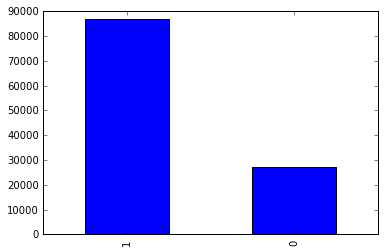

In [4]:
train_df.target.value_counts().plot(kind = 'bar')

In [5]:
a_df, tmp_indexer = pd.factorize(train_df.v3)

In [6]:
train_df.v3.value_counts()

C    110584
A       227
B        53
Name: v3, dtype: int64

In [7]:
# fill in missing values
for feature in test_df.columns:
    # for float feature, fill in the missing values with the mean
    if train_df[feature].dtype == 'float64':
        train_df[feature].loc[pd.isnull(train_df[feature])] = train_df[feature].median()
        test_df[feature].loc[pd.isnull(test_df[feature])]   = test_df[feature].median()
        
    # for string feature, fill in the missing value with most occurred value
    if train_df[feature].dtype == 'object':
        train_df[feature], tmp_indexer = pd.factorize(train_df[feature])
        test_df[feature] = tmp_indexer.get_indexer(test_df[feature])
    # for int feature, fill in the missing value with the most occured value
    if train_df[feature].dtype == 'int64':
        train_df[feature].loc[pd.isnull(train_df[feature])] = train_df[feature].value_counts().index[0]
        test_df[feature].loc[pd.isnull(test_df[feature])]   =  test_df[feature].value_counts().index[0]


C:\Users\lic14\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
train_df.head(n = 200)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739e+00,8.727474,0,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,3.575369e-02,0,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
1,4,1,1.469550e+00,7.023803,0,4.205991,9.191265,2.412790,2.452166,2.301630,...,6.749117,2.739239,5.988956e-01,1,1.614802,2.963620,1.957825,0,1.560138,1.589403e+00
2,5,1,9.438769e-01,5.310079,0,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,1.345191e-02,2,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,6,1,7.974146e-01,8.304757,0,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,2.267384e-03,3,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
4,8,1,1.469550e+00,7.023803,0,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,1.398639e-01,4,1.614802,2.963620,1.798436,0,1.560138,1.589403e+00
5,9,0,1.469550e+00,7.023803,0,4.205991,8.856791,2.412790,2.452166,0.359993,...,6.749117,2.739239,4.986116e-02,5,1.614802,2.963620,1.536222,0,1.560138,1.589403e+00
6,12,0,8.998057e-01,7.312995,0,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,8.375832e-02,6,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
7,21,1,1.469550e+00,7.023803,0,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,1.398639e-01,7,1.614802,2.963620,1.798436,0,1.560138,1.589403e+00
8,22,0,2.078651e+00,8.462619,-1,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,1.865950e-02,8,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,23,1,1.144802e+00,5.880606,0,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,8.943653e-03,9,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00


In [9]:
test_df.head(n = 100)

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,0,4.200778,6.577000,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,1,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,1.462450e+00,6.985397,0,4.202803,8.648951,2.410546,2.450766,0.382796,9.074074,...,6.752577,2.736875,1.397066e-01,75,1.613876,2.970825,1.798436,0,1.561753,1.584158e+00
2,2,-4.903407e-07,8.201529,0,4.544371,6.550100,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,48,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,0,1.657216,9.773080,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,30,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,0,4.638388,8.520510,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,38,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00
5,11,1.733601e+00,7.525109,0,3.263905,5.608608,2.356090,2.369477,0.065481,9.935483,...,5.032257,2.551374,-9.391195e-07,27,1.541607,3.463855,1.196959,0,2.598869,1.217392e+00
6,13,1.462450e+00,6.985397,0,4.202803,8.648951,2.410546,2.450766,0.382796,9.074074,...,6.752577,2.736875,1.397066e-01,50,1.613876,2.970825,1.798436,0,1.561753,1.584158e+00
7,14,2.027902e+00,6.947583,0,5.840414,7.944518,3.607374,2.541107,1.870223,9.818181,...,8.218182,2.011008,6.788057e-01,6,1.591433,2.541105,1.386445,0,1.129412,3.055555e+00
8,15,1.296225e+00,9.573390,0,3.387392,9.316076,2.133125,1.650447,0.236811,12.050474,...,10.977917,2.984337,4.996407e-03,43,1.327866,3.999610,1.854306,1,1.830189,1.855670e+00
9,16,1.462450e+00,6.985397,0,4.202803,8.648951,2.410546,2.450766,0.382796,9.074074,...,6.752577,2.736875,1.397066e-01,22,1.613876,2.970825,1.798436,0,1.561753,1.584158e+00


In [10]:
x = train_df.drop(['ID', 'target'], axis = 1)
y = train_df['target']

n = int(x.shape[0] * 0.95)

x_train = x.iloc[1:n, :]
y_train = y.iloc[1:n]

x_vali  = x.iloc[n:, :]
y_vali  = y.iloc[n:]

x_test  = test_df.drop('ID', axis = 1)

In [11]:
from sklearn.metrics import log_loss

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
etc = ExtraTreesClassifier(n_estimators=1500,criterion= 'entropy', max_depth = 50)
etc.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=50, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
etc.score(x_vali, y_vali)

0.78502711212174214

In [59]:
etc.score(x_train, y_train)

0.99860961483568589

In [60]:
log_loss(y_vali, etc.predict_proba(x_vali)[:, 1])

0.46035430654314818

In [61]:
y_pred = etc.predict_proba(x_test)
#print y_pred

pd.DataFrame({"ID": id_test, "PredictedProb": y_pred[:,1]}).to_csv('BNP_ExtraTree.csv',index=False)